In [1]:
import zipfile
import os

# Define ZIP file and its extraction directory
archives = {
    "archive (3).zip": "unzipped_archive_3"
}

# Unzip the archive
for zip_path, extract_dir in archives.items():
    if os.path.exists(zip_path):
        os.makedirs(extract_dir, exist_ok=True)
        with zipfile.ZipFile(zip_path, 'r') as zip_ref:
            zip_ref.extractall(extract_dir)
        print(f"✅ Extracted '{zip_path}' to '{os.path.abspath(extract_dir)}'")
    else:
        print(f"❌ File not found: {zip_path}")


✅ Extracted 'archive (3).zip' to 'C:\Users\malyk\unzipped_archive_3'


In [3]:
import zipfile
import os

# Path to your ZIP file
zip_path = "archive (3).zip"

# Directory where files will be extracted
extract_dir = "unzipped_files"

# Create the directory if it doesn't exist
os.makedirs(extract_dir, exist_ok=True)

# Unzip
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_dir)

print("Files extracted to:", os.path.abspath(extract_dir))

Files extracted to: C:\Users\malyk\unzipped_files


In [5]:
import zipfile
import os
import pandas as pd

# Step 1: Unzip the archive
archives = {
    "archive (3).zip": "unzipped_archive_3"
}

for zip_path, extract_dir in archives.items():
    if os.path.exists(zip_path):
        os.makedirs(extract_dir, exist_ok=True)
        with zipfile.ZipFile(zip_path, 'r') as zip_ref:
            zip_ref.extractall(extract_dir)
        print(f"✅ Extracted '{zip_path}' to '{os.path.abspath(extract_dir)}'")
    else:
        print(f"❌ File not found: {zip_path}")

# Step 2: Find CSV files and print first 5 columns
for name, folder in archives.items():
    print(f"\n🔎 Checking folder: {folder}")
    files = os.listdir(folder)
    csv_files = [f for f in files if f.endswith(".csv")]
    
    if not csv_files:
        print("❌ No CSV files found.")
        continue

    for csv_file in csv_files:
        file_path = os.path.join(folder, csv_file)
        print(f"\n📄 File: {csv_file}")
        try:
            df = pd.read_csv(file_path)
            print(df.iloc[:, :5].head())  # first 5 columns and first 5 rows
        except Exception as e:
            print(f"⚠️ Could not read {csv_file}: {e}")


✅ Extracted 'archive (3).zip' to 'C:\Users\malyk\unzipped_archive_3'

🔎 Checking folder: unzipped_archive_3

📄 File: cleaned_Students Social Media Addiction.csv
   student_id  age  gender academic_level     country
0           1   19  Female  Undergraduate  Bangladesh
1           2   22    Male       Graduate       India
2           3   20  Female  Undergraduate         USA
3           4   18    Male    High School          UK
4           5   21    Male       Graduate      Canada

📄 File: Students Social Media Addiction.csv
   Student_ID  Age  Gender Academic_Level     Country
0           1   19  Female  Undergraduate  Bangladesh
1           2   22    Male       Graduate       India
2           3   20  Female  Undergraduate         USA
3           4   18    Male    High School          UK
4           5   21    Male       Graduate      Canada


In [29]:
print(df.columns)

Index(['Student_ID', 'Age', 'Gender', 'Academic_Level', 'Country',
       'Avg_Daily_Usage_Hours', 'Most_Used_Platform',
       'Affects_Academic_Performance', 'Sleep_Hours_Per_Night',
       'Mental_Health_Score', 'Relationship_Status',
       'Conflicts_Over_Social_Media', 'Addicted_Score'],
      dtype='object')


In [31]:
df.describe()

,Student_ID,Age,Avg_Daily_Usage_Hours,Sleep_Hours_Per_Night,Mental_Health_Score,Conflicts_Over_Social_Media,Addicted_Score
count,705.000000,705.000000,705.000000,705.000000,705.000000,705.000000,705.000000
mean,353.000000,20.659574,4.918723,6.868936,6.226950,2.849645,6.436879
std,203.660256,1.399217,1.257395,1.126848,1.105055,0.957968,1.587165
min,1.000000,18.000000,1.500000,3.800000,4.000000,0.000000,2.000000
25%,177.000000,19.000000,4.100000,6.000000,5.000000,2.000000,5.000000
50%,353.000000,21.000000,4.800000,6.900000,6.000000,3.000000,7.000000
75%,529.000000,22.000000,5.800000,7.700000,7.000000,4.000000,8.000000
max,705.000000,24.000000,8.500000,9.600000,9.000000,5.000000,9.000000


In [7]:
import zipfile
import os
import pandas as pd

# Step 1: Unzip the archive
archives = {
    "archive (3).zip": "unzipped_archive_3"
}

for zip_path, extract_dir in archives.items():
    if os.path.exists(zip_path):
        os.makedirs(extract_dir, exist_ok=True)
        with zipfile.ZipFile(zip_path, 'r') as zip_ref:
            zip_ref.extractall(extract_dir)
        print(f"✅ Extracted '{zip_path}' to '{os.path.abspath(extract_dir)}'")
    else:
        print(f"❌ File not found: {zip_path}")

# Step 2: Clean each CSV
for name, folder in archives.items():
    print(f"\n🧹 Cleaning files in: {folder}")
    files = os.listdir(folder)
    csv_files = [f for f in files if f.endswith(".csv")]

    if not csv_files:
        print("❌ No CSV files found.")
        continue

    for csv_file in csv_files:
        file_path = os.path.join(folder, csv_file)
        print(f"\n📄 Cleaning file: {csv_file}")
        try:
            df = pd.read_csv(file_path)

            # Drop completely empty rows or columns
            df.dropna(axis=0, how='all', inplace=True)
            df.dropna(axis=1, how='all', inplace=True)

            # Clean column names
            df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')

            # Drop duplicate rows
            df.drop_duplicates(inplace=True)

            # Try converting columns to appropriate data types
            df = df.convert_dtypes()

            # Handle remaining missing values
            for col in df.columns:
                if df[col].isna().sum() > 0:
                    if df[col].dtype == "string" or df[col].dtype == "object":
                        df[col].fillna("unknown", inplace=True)
                    elif pd.api.types.is_numeric_dtype(df[col]):
                        df[col].fillna(df[col].median(), inplace=True)

            # Save cleaned file
            cleaned_name = f"cleaned_{csv_file}"
            cleaned_path = os.path.join(folder, cleaned_name)
            df.to_csv(cleaned_path, index=False)
            print(f"✅ Saved cleaned file as: {cleaned_path}")

        except Exception as e:
            print(f"⚠️ Could not process {csv_file}: {e}")


✅ Extracted 'archive (3).zip' to 'C:\Users\malyk\unzipped_archive_3'

🧹 Cleaning files in: unzipped_archive_3

📄 Cleaning file: cleaned_Students Social Media Addiction.csv
✅ Saved cleaned file as: unzipped_archive_3\cleaned_cleaned_Students Social Media Addiction.csv

📄 Cleaning file: Students Social Media Addiction.csv
✅ Saved cleaned file as: unzipped_archive_3\cleaned_Students Social Media Addiction.csv


In [11]:
import pandas as pd
import os

# Define the folder where cleaned files are located
cleaned_folder = "unzipped_archive_3"

# Load cleaned CSV files
dataframes = {}

print(f"\n📥 Loading cleaned CSV files from: {cleaned_folder}")
files = os.listdir(cleaned_folder)
cleaned_csvs = [f for f in files if f.startswith("cleaned_") and f.endswith(".csv")]

if not cleaned_csvs:
    print("❌ No cleaned CSV files found.")
else:
    for csv_file in cleaned_csvs:
        file_path = os.path.join(cleaned_folder, csv_file)
        try:
            df_name = os.path.splitext(csv_file)[0].replace("cleaned_", "")
            df = pd.read_csv(file_path)
            dataframes[df_name] = df
            print(f"✅ Loaded '{csv_file}' into DataFrame: dataframes['{df_name}']")
        except Exception as e:
            print(f"⚠️ Could not load {csv_file}: {e}")



📥 Loading cleaned CSV files from: unzipped_archive_3
✅ Loaded 'cleaned_cleaned_Students Social Media Addiction.csv' into DataFrame: dataframes['Students Social Media Addiction']
✅ Loaded 'cleaned_Students Social Media Addiction.csv' into DataFrame: dataframes['Students Social Media Addiction']



📊 --- EDA for: Students Social Media Addiction ---
Shape: (705, 13)

Column Types:
student_id                        int64
age                               int64
gender                           object
academic_level                   object
country                          object
avg_daily_usage_hours           float64
most_used_platform               object
affects_academic_performance     object
sleep_hours_per_night           float64
mental_health_score               int64
relationship_status              object
conflicts_over_social_media       int64
addicted_score                    int64
dtype: object

Missing Values:
student_id                      0
age                             0
gender                          0
academic_level                  0
country                         0
avg_daily_usage_hours           0
most_used_platform              0
affects_academic_performance    0
sleep_hours_per_night           0
mental_health_score             0
relationship_status      

C:\Users\malyk\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


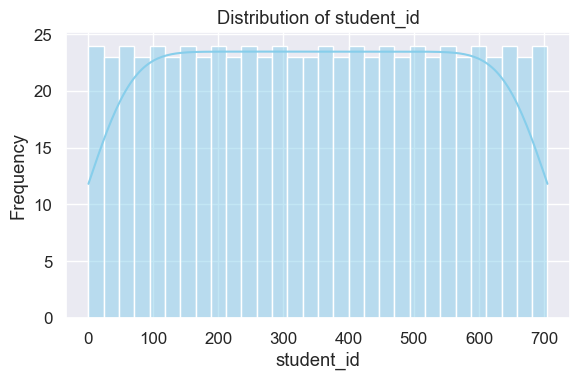

C:\Users\malyk\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


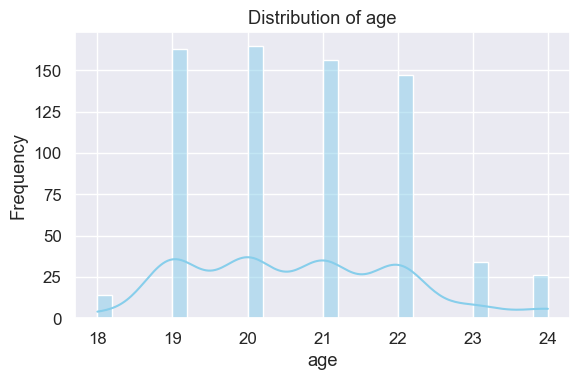

C:\Users\malyk\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


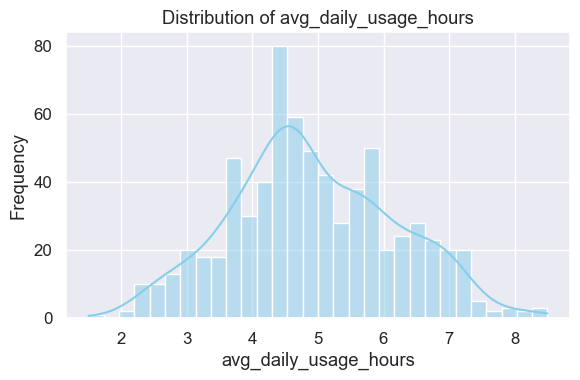

C:\Users\malyk\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


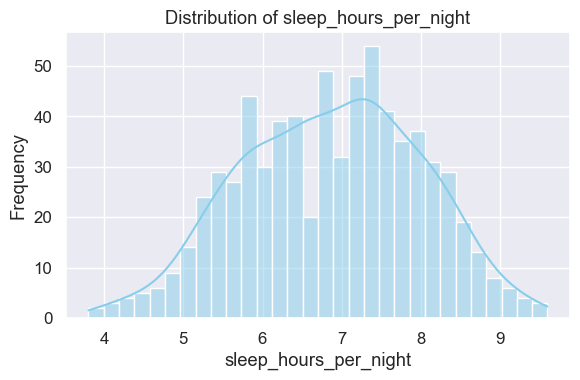

C:\Users\malyk\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


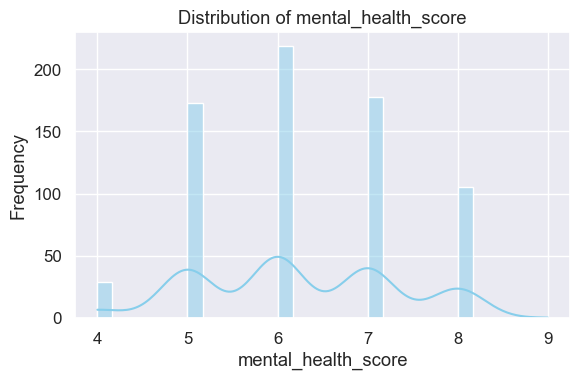

C:\Users\malyk\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


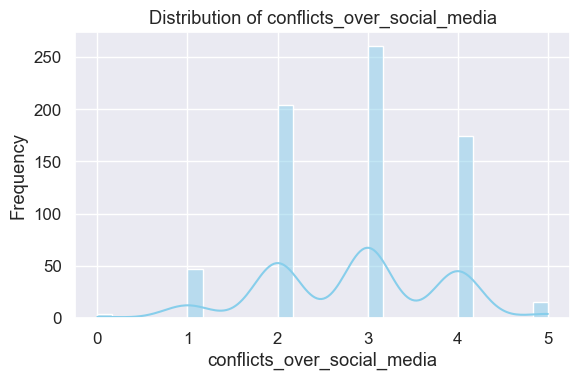

C:\Users\malyk\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


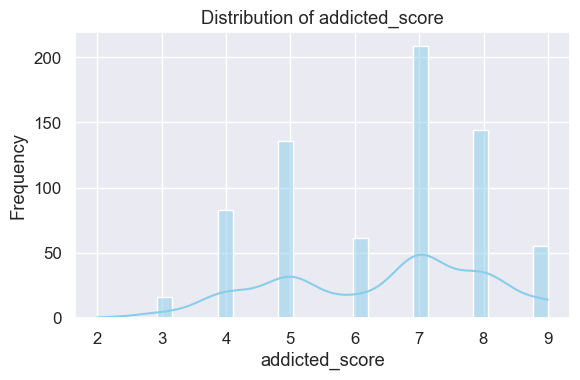

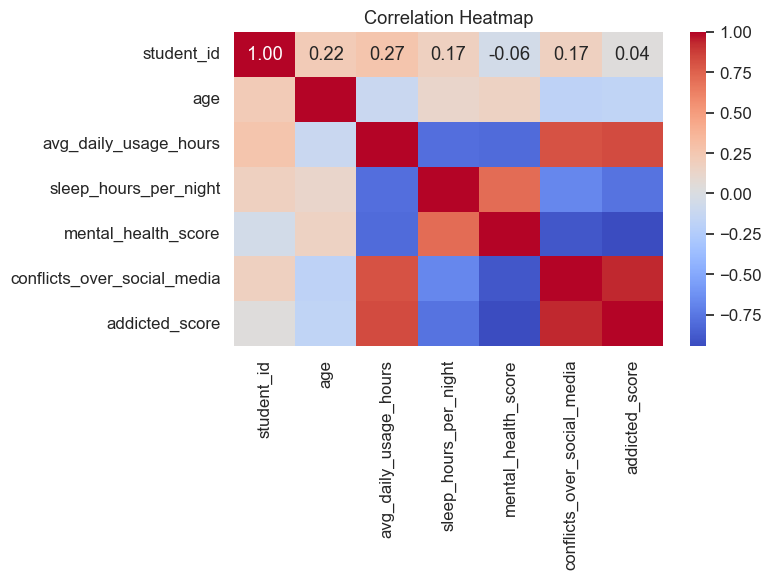


📊 --- EDA for: Students Social Media Addiction ---
Shape: (705, 13)

Column Types:
student_id                        int64
age                               int64
gender                           object
academic_level                   object
country                          object
avg_daily_usage_hours           float64
most_used_platform               object
affects_academic_performance     object
sleep_hours_per_night           float64
mental_health_score               int64
relationship_status              object
conflicts_over_social_media       int64
addicted_score                    int64
dtype: object

Missing Values:
student_id                      0
age                             0
gender                          0
academic_level                  0
country                         0
avg_daily_usage_hours           0
most_used_platform              0
affects_academic_performance    0
sleep_hours_per_night           0
mental_health_score             0
relationship_status      

C:\Users\malyk\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


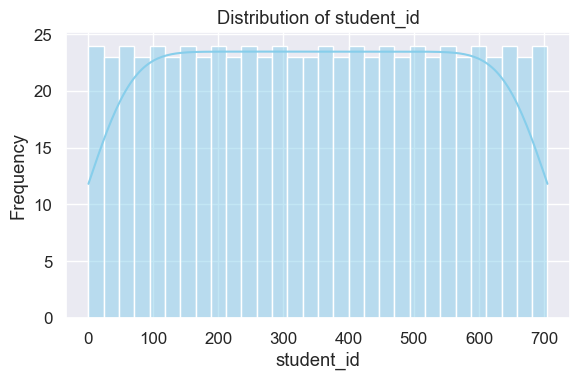

C:\Users\malyk\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


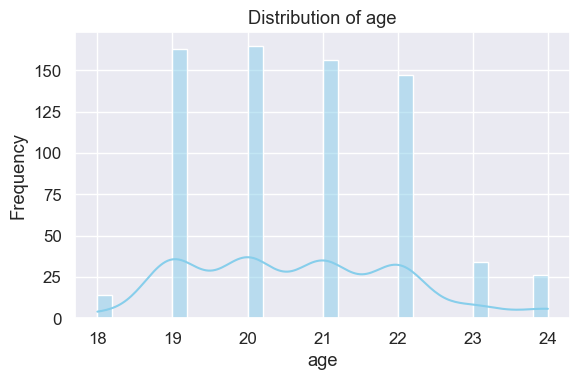

C:\Users\malyk\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


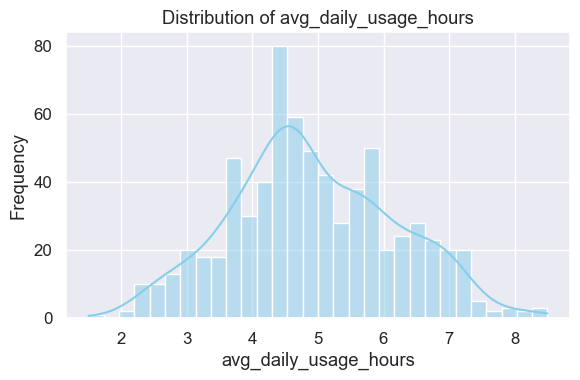

C:\Users\malyk\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


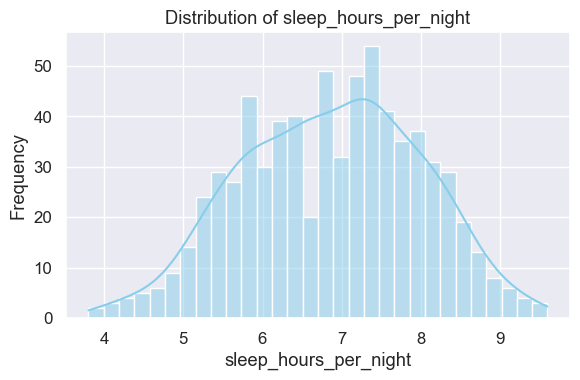

C:\Users\malyk\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


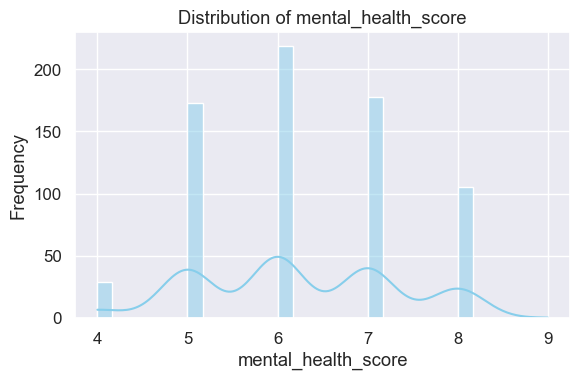

C:\Users\malyk\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


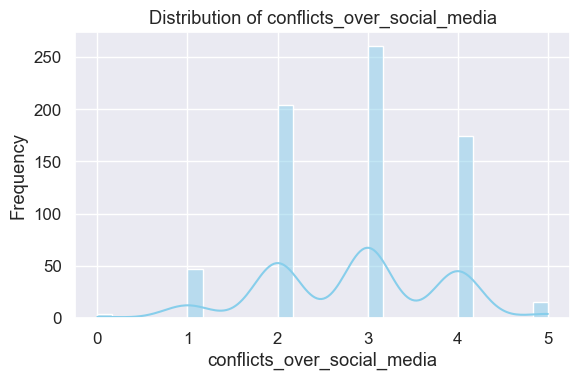

C:\Users\malyk\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


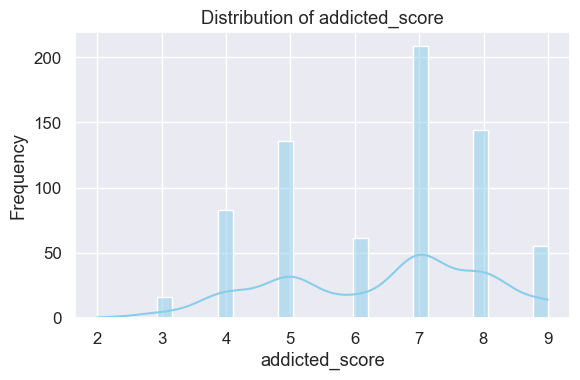

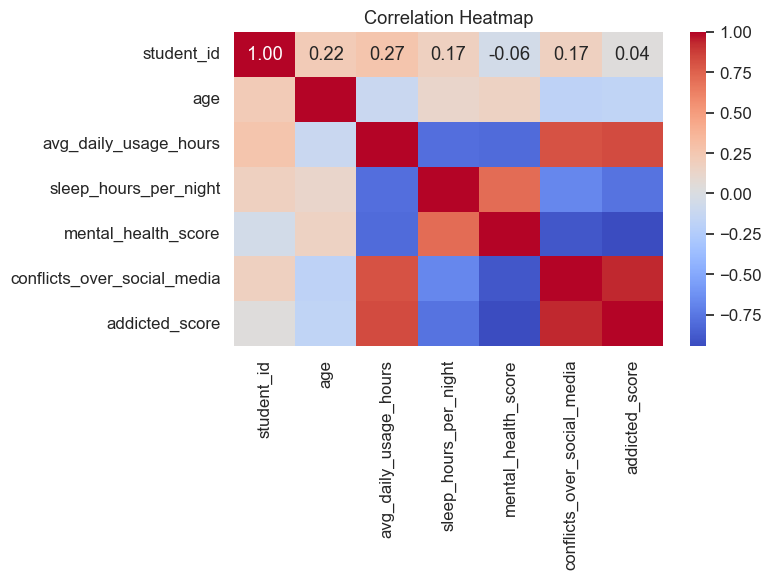

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Set up matplotlib and seaborn
plt.style.use('ggplot')
sns.set(font_scale=1.1)

# Path to folder with cleaned CSVs
cleaned_folder = "unzipped_archive_3"
files = os.listdir(cleaned_folder)
cleaned_csvs = [f for f in files if f.startswith("cleaned_") and f.endswith(".csv")]

# Load DataFrames
dataframes = {}
for csv_file in cleaned_csvs:
    df_name = os.path.splitext(csv_file)[0].replace("cleaned_", "")
    file_path = os.path.join(cleaned_folder, csv_file)
    df = pd.read_csv(file_path)
    dataframes[df_name] = df
    print(f"\n📊 --- EDA for: {df_name} ---")

    # 1. Shape and Column Info
    print(f"Shape: {df.shape}")
    print("\nColumn Types:")
    print(df.dtypes)

    # 2. Missing Values
    print("\nMissing Values:")
    print(df.isnull().sum())

    # 3. Descriptive Stats
    print("\nDescriptive Statistics:")
    print(df.describe(include='all').T)

    # 4. Unique Values in Each Column
    print("\nUnique Values (first 5 cols):")
    for col in df.columns[:5]:
        unique_vals = df[col].nunique()
        print(f"  {col}: {unique_vals} unique")

    # 5. Histograms for Numerical Columns
    numeric_cols = df.select_dtypes(include=['number']).columns
    for col in numeric_cols:
        plt.figure(figsize=(6, 4))
        sns.histplot(df[col], bins=30, kde=True, color='skyblue')
        plt.title(f"Distribution of {col}")
        plt.xlabel(col)
        plt.ylabel("Frequency")
        plt.tight_layout()
        plt.show()

    # 6. Correlation Heatmap
    if len(numeric_cols) >= 2:
        plt.figure(figsize=(8, 6))
        corr = df[numeric_cols].corr()
        sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
        plt.title("Correlation Heatmap")
        plt.tight_layout()
        plt.show()


Loaded dataset with shape: (705, 13)


C:\Users\malyk\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


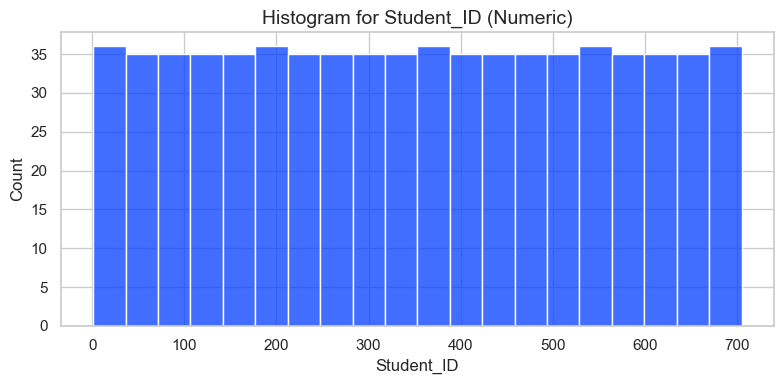

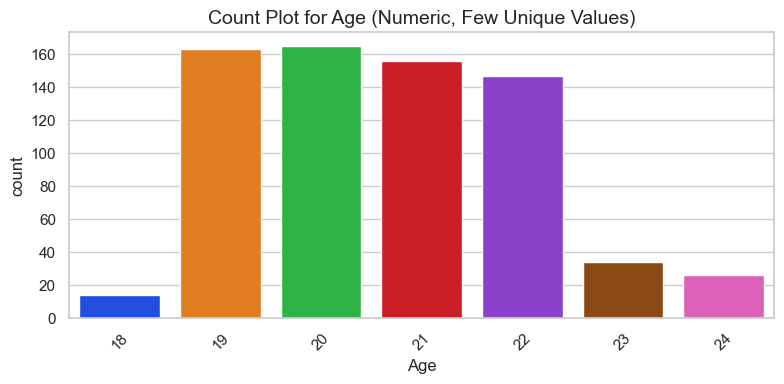

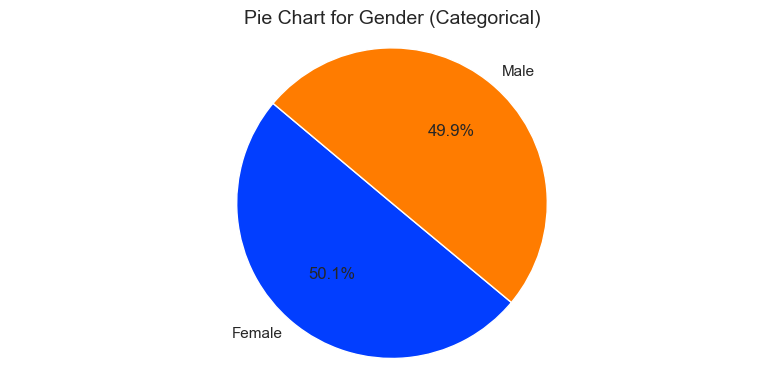

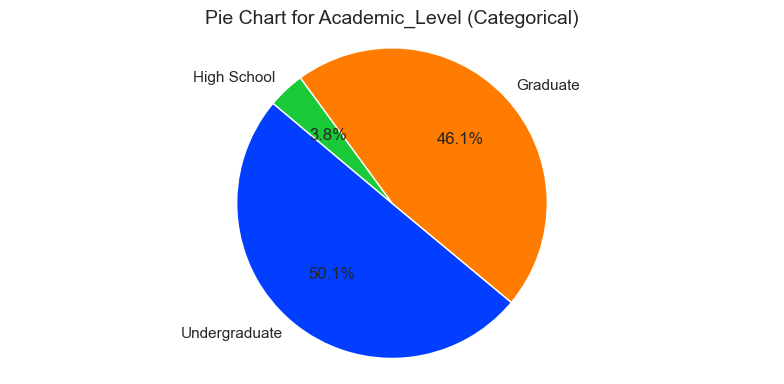

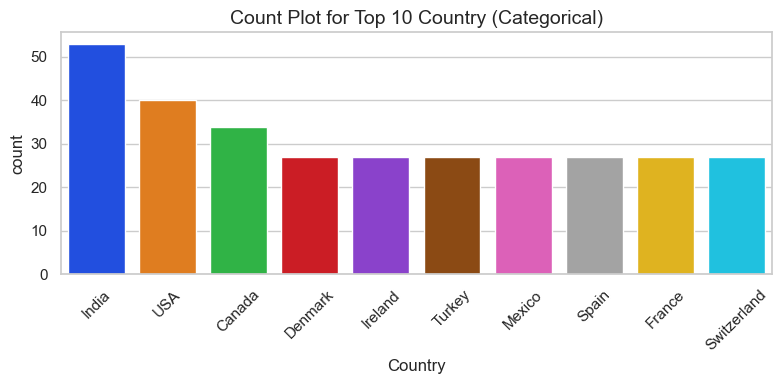

C:\Users\malyk\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


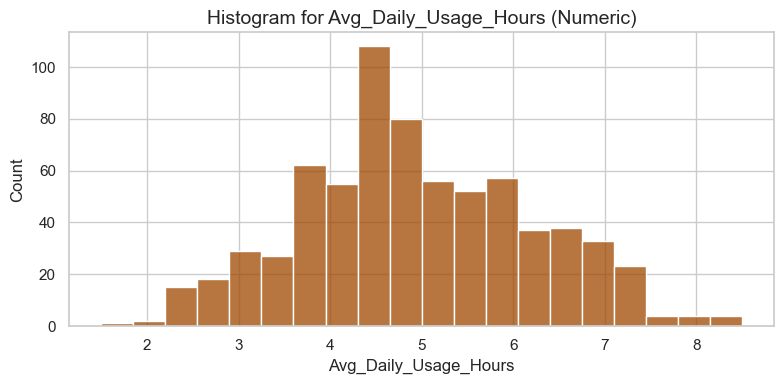

C:\Users\malyk\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


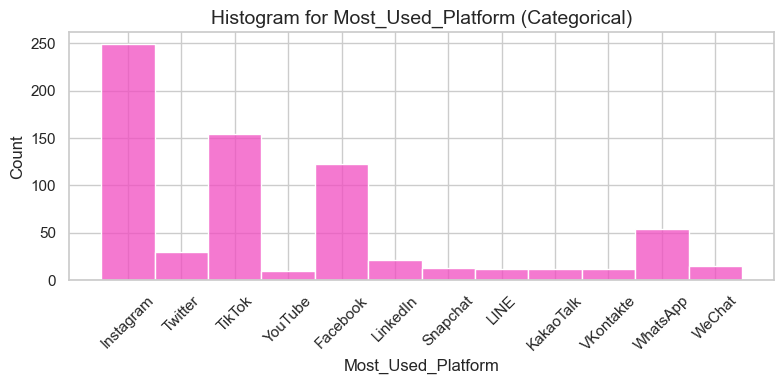

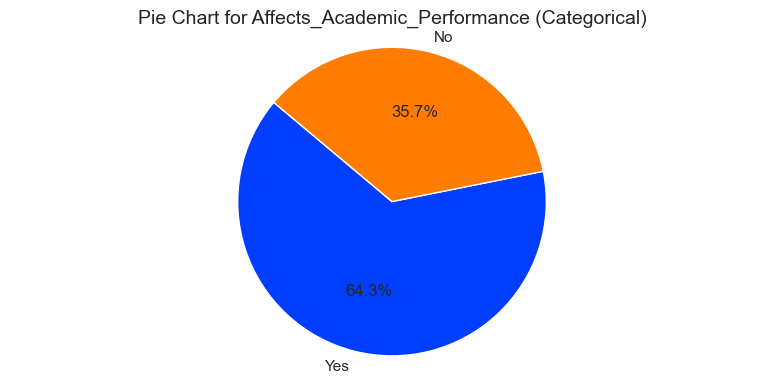

C:\Users\malyk\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


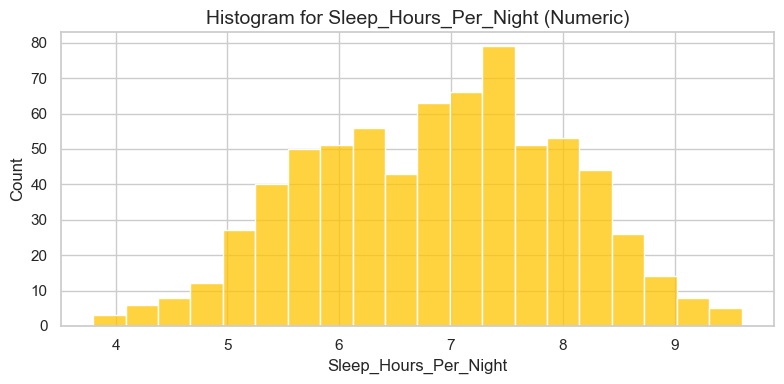

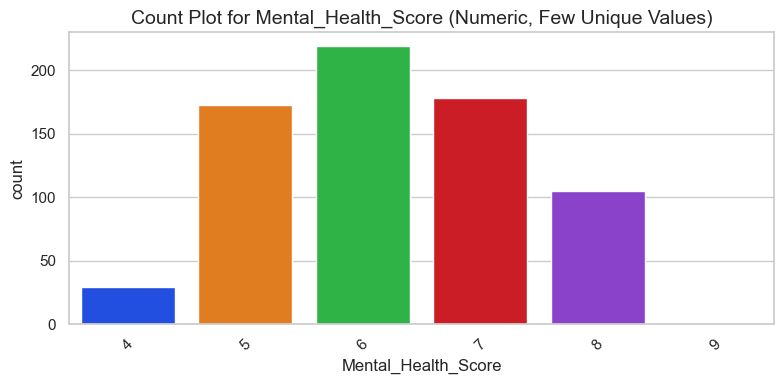

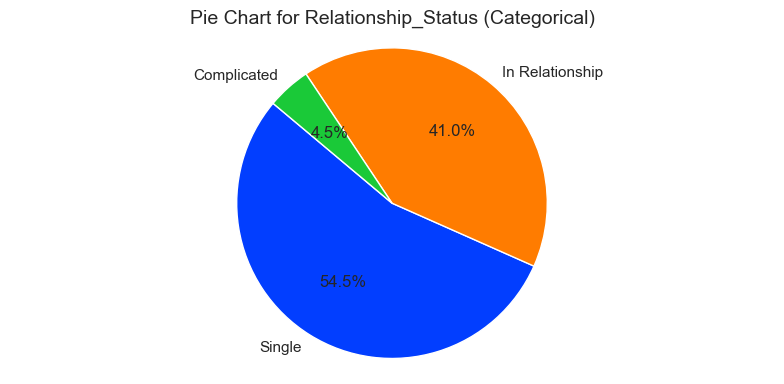

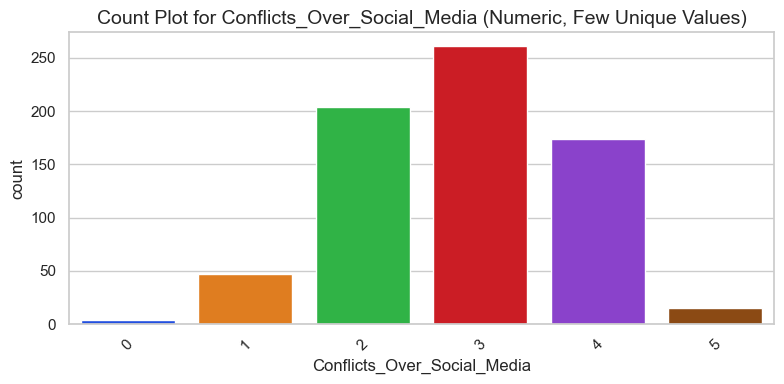

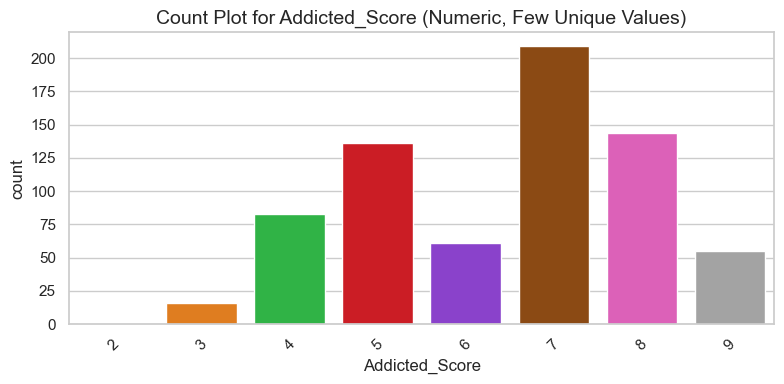

In [27]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns

def plot_feature_bars(df):
    sns.set(style="whitegrid")
    bright_palette = sns.color_palette("bright")

    for i, col in enumerate(df.columns):
        plt.figure(figsize=(8, 4))

        col_lower = col.lower()
        if not pd.api.types.is_numeric_dtype(df[col]):
            # Categorical column
            if col_lower == "country":
                # Top 10 countries count plot
                top_10 = df[col].value_counts().nlargest(10).index
                filtered_df = df[df[col].isin(top_10)]
                sns.countplot(data=filtered_df, x=col, order=top_10, palette=bright_palette)
                plt.title(f'Count Plot for Top 10 {col} (Categorical)', fontsize=14)
                plt.xticks(rotation=45)

            elif col_lower == "most_used_platform":
                # Histogram for Most_Used_Platform (categorical but treated as histogram)
                counts = df[col].value_counts()
                sns.histplot(df[col], bins=len(counts), discrete=True, color=bright_palette[i % len(bright_palette)])
                plt.title(f'Histogram for {col} (Categorical)', fontsize=14)
                plt.xticks(rotation=45)

            else:
                # Pie chart for other categorical columns
                counts = df[col].value_counts()
                colors = bright_palette[:len(counts)]
                plt.pie(counts, labels=counts.index, colors=colors, autopct='%1.1f%%', startangle=140)
                plt.title(f'Pie Chart for {col} (Categorical)', fontsize=14)
                plt.axis('equal')  # Keep pie circular
                plt.tight_layout()
                plt.show()
                continue  # Skip rest for this column
        else:
            # Numeric column
            unique_vals = df[col].nunique()
            if unique_vals <= 20:
                sns.countplot(data=df, x=col, palette=bright_palette)
                plt.title(f'Count Plot for {col} (Numeric, Few Unique Values)', fontsize=14)
                plt.xticks(rotation=45)
            else:
                sns.histplot(df[col].dropna(), bins=20, kde=False, color=bright_palette[i % len(bright_palette)])
                plt.title(f'Histogram for {col} (Numeric)', fontsize=14)

        plt.tight_layout()
        plt.show()

# Load the dataset
folder = "unzipped_archive_3"
filename = "Students Social Media Addiction.csv"
file_path = os.path.join(folder, filename)

if os.path.exists(file_path):
    df = pd.read_csv(file_path)
    print(f"Loaded dataset with shape: {df.shape}")

    plot_feature_bars(df)
else:
    print(f"Error: File does not exist at path: {file_path}")



In [9]:
import pandas as pd
import os

def analyze_dataset(df):
    print(f"Number of data points (rows): {df.shape[0]}")
    print(f"Number of features (columns): {df.shape[1]}")

    print("\nChecking for missing values...")
    total_missing = df.isna().sum().sum()
    if total_missing == 0:
        print("No missing values found.")
    else:
        print(f"Total missing values in dataset: {total_missing}")

    def detect_outliers(series):
        if pd.api.types.is_numeric_dtype(series):
            Q1 = series.quantile(0.25)
            Q3 = series.quantile(0.75)
            IQR = Q3 - Q1
            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR
            outliers = series[(series < lower_bound) | (series > upper_bound)]
            return "Yes" if len(outliers) > 0 else "No"
        else:
            return "N/A"

    rows = []
    for col in df.columns:
        series = df[col]
        n_missing = series.isna().sum()

        if pd.api.types.is_numeric_dtype(series):
            f_type = "Numerical"
            values_desc = f"{series.min()} to {series.max()}"
            outlier = detect_outliers(series.dropna())
        else:
            f_type = "Categorical"
            unique_vals = sorted(series.dropna().unique())
            values_desc = ", ".join(map(str, unique_vals))
            outlier = "N/A"

        rows.append({
            "Feature": col,
            "Type": f_type,
            "Values": values_desc,
            "Missing Values": n_missing,
            "Outliers (IQR method)": outlier
        })

    print("\nDefinition of outlier:")
    print("Values outside 1.5 times the interquartile range (IQR) below Q1 or above Q3.")

    summary_df = pd.DataFrame(rows)
    return summary_df


# Load the dataset
folder = "unzipped_archive_3"
filename = "cleaned_Students Social Media Addiction.csv"
file_path = os.path.join(folder, filename)

if os.path.exists(file_path):
    df = pd.read_csv(file_path)
    print(f"Loaded dataset with shape: {df.shape}")

    summary = analyze_dataset(df)
    print(summary)
else:
    print(f"Error: File does not exist at path: {file_path}")


Loaded dataset with shape: (705, 13)
Number of data points (rows): 705
Number of features (columns): 13

Checking for missing values...
No missing values found.

Definition of outlier:
Values outside 1.5 times the interquartile range (IQR) below Q1 or above Q3.
                         Feature         Type  \
0                     student_id    Numerical   
1                            age    Numerical   
2                         gender  Categorical   
3                 academic_level  Categorical   
4                        country  Categorical   
5          avg_daily_usage_hours    Numerical   
6             most_used_platform  Categorical   
7   affects_academic_performance  Categorical   
8          sleep_hours_per_night    Numerical   
9            mental_health_score    Numerical   
10           relationship_status  Categorical   
11   conflicts_over_social_media    Numerical   
12                addicted_score    Numerical   

                                               Valu

C:\Users\malyk\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\malyk\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\malyk\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\malyk\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

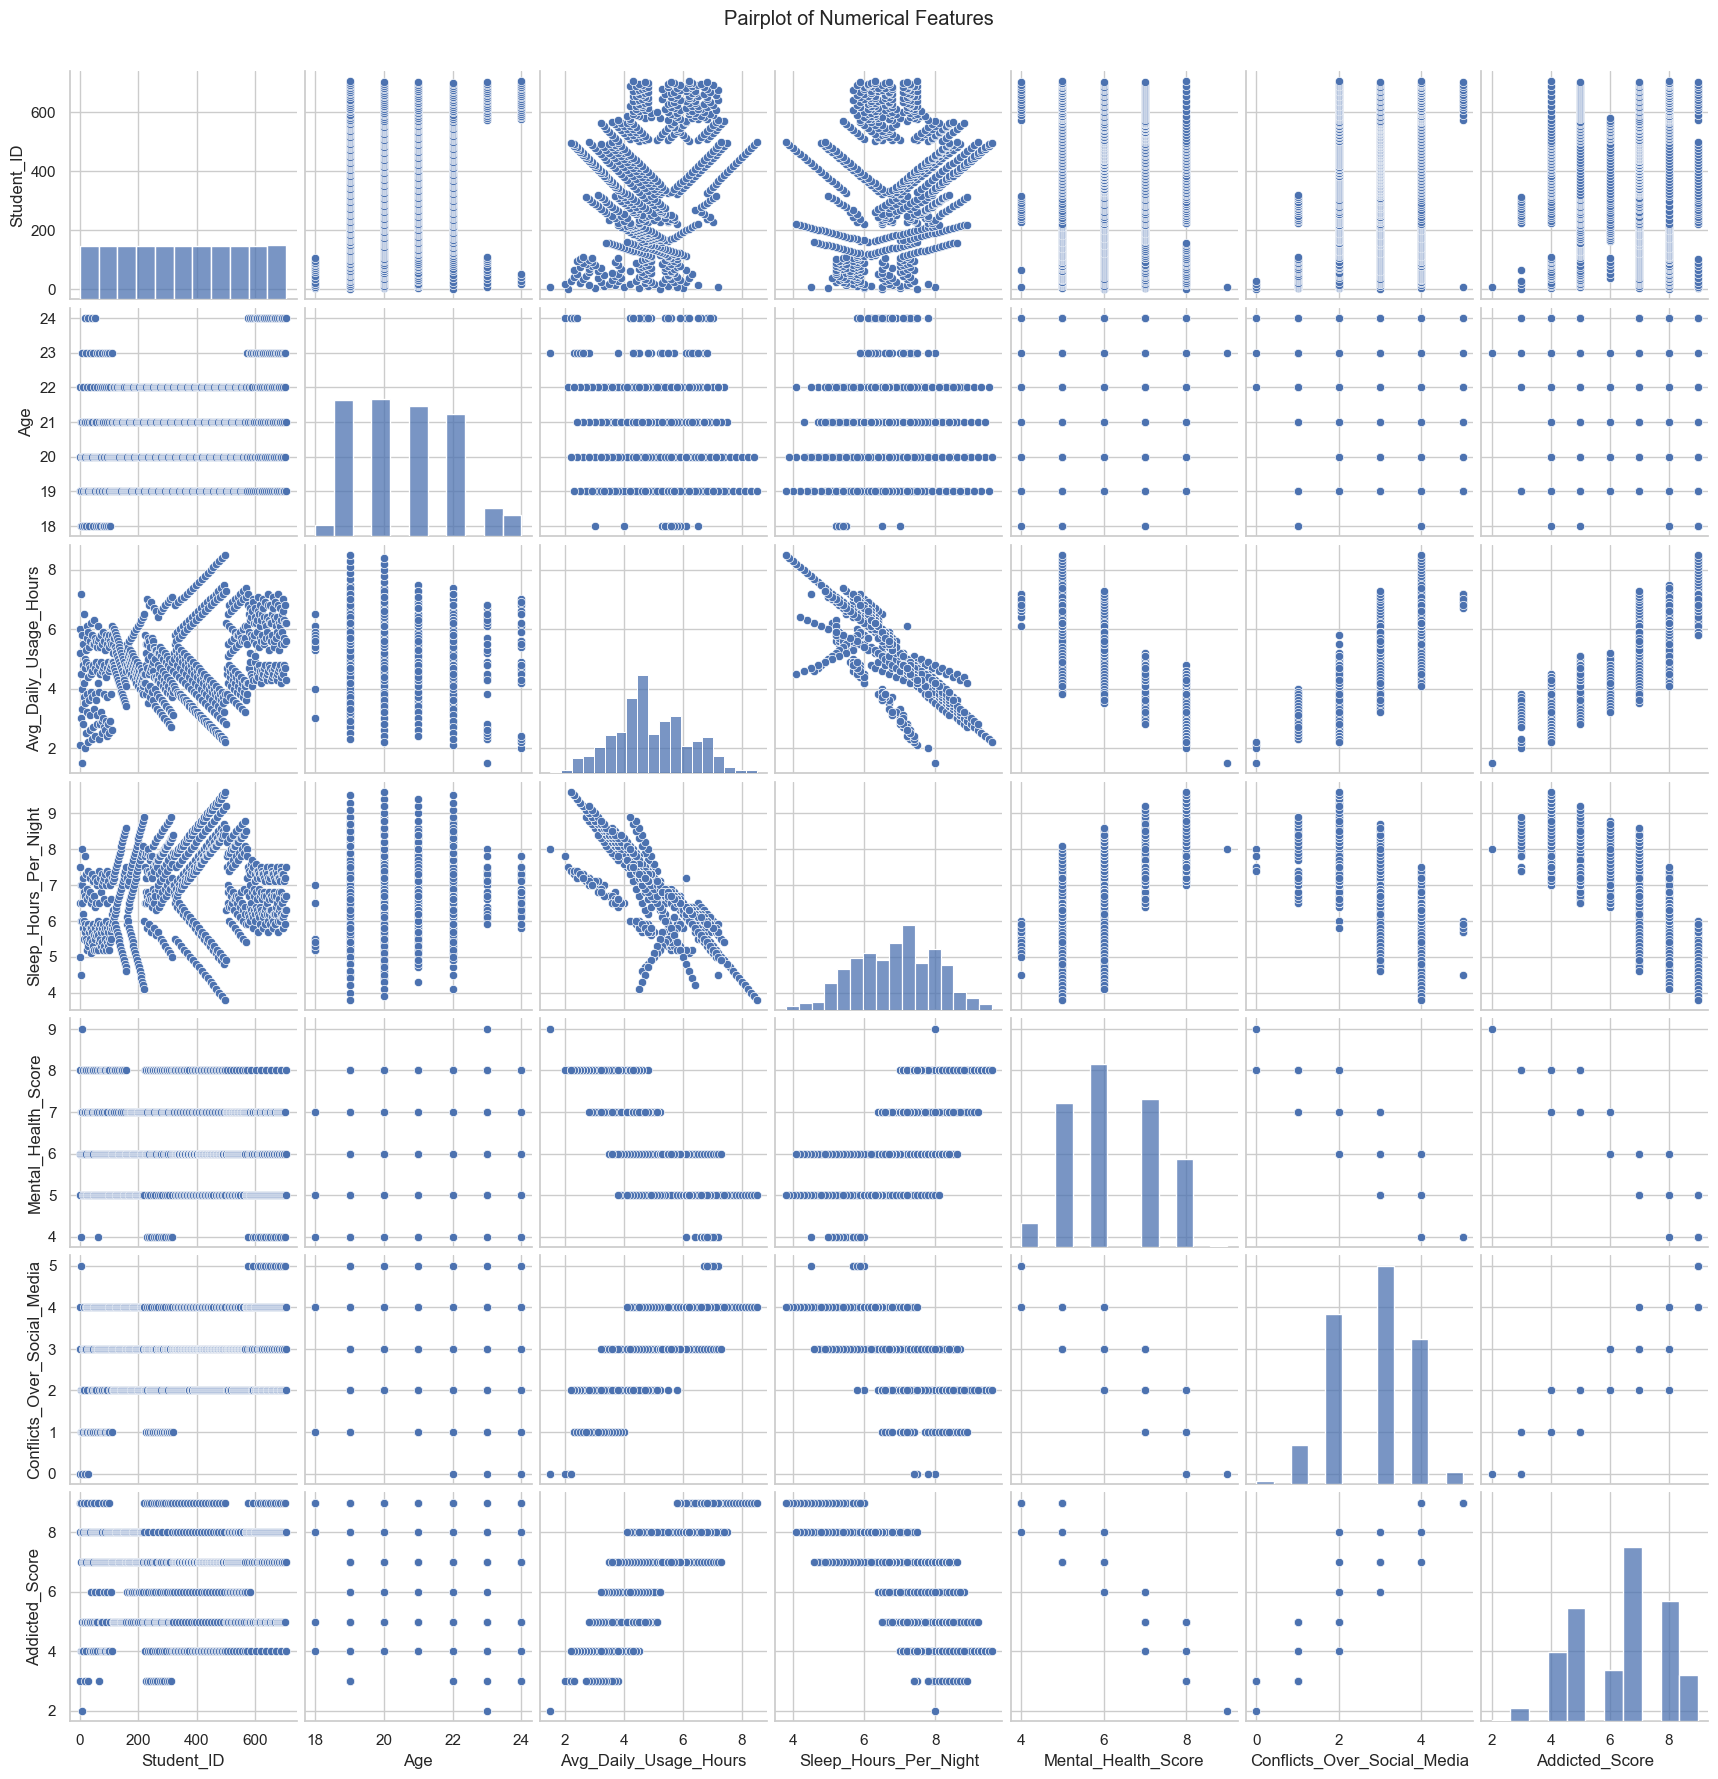

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df is already loaded

# Select numeric columns only
numeric_cols = df.select_dtypes(include=['number']).columns

if len(numeric_cols) > 1:
    sns.pairplot(df[numeric_cols].dropna())
    plt.suptitle('Pairplot of Numerical Features', y=1.02)
    plt.show()
else:
    print("Not enough numeric columns to create a pairplot.")



In [45]:


# Columns to use
numeric_features = ['Age', 'Avg_Daily_Usage_Hours', 'Sleep_Hours_Per_Night', 'Mental_Health_Score', 'Addicted_Score']
categorical_features = ['Gender', 'Academic_Level']

# Drop rows with missing values in any of these columns
data_subset = df[numeric_features + categorical_features].dropna()

# Scale numeric features
scaler = StandardScaler()
scaled_numeric = scaler.fit_transform(data_subset[numeric_features])
scaled_numeric_df = pd.DataFrame(scaled_numeric, columns=numeric_features, index=data_subset.index)

# One-hot encode categorical features
encoded_cats = pd.get_dummies(data_subset[categorical_features], drop_first=True)

# Combine scaled numeric and encoded categorical features
prepared_data = pd.concat([scaled_numeric_df, encoded_cats], axis=1)

print("Prepared data for clustering (numeric scaled + categorical encoded):")
print(prepared_data.head())



Prepared data for clustering (numeric scaled + categorical encoded):
        Age  Avg_Daily_Usage_Hours  Sleep_Hours_Per_Night  \
0 -1.186915               0.223857              -0.327638   
1  0.958662              -2.243309               0.560423   
2 -0.471723               0.860545              -1.659730   
3 -1.902108              -1.527035               0.116393   
4  0.243470              -0.333245              -0.771668   

   Mental_Health_Score  Addicted_Score  Gender_Male  \
0            -0.205520        0.985550        False   
1             1.605628       -2.166958         True   
2            -1.111095        1.616052        False   
3             0.700054       -1.536456         True   
4            -0.205520        0.355048         True   

   Academic_Level_High School  Academic_Level_Undergraduate  
0                       False                          True  
1                       False                         False  
2                       False                  

C:\Users\malyk\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\malyk\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\Users\malyk\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\malyk\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environme

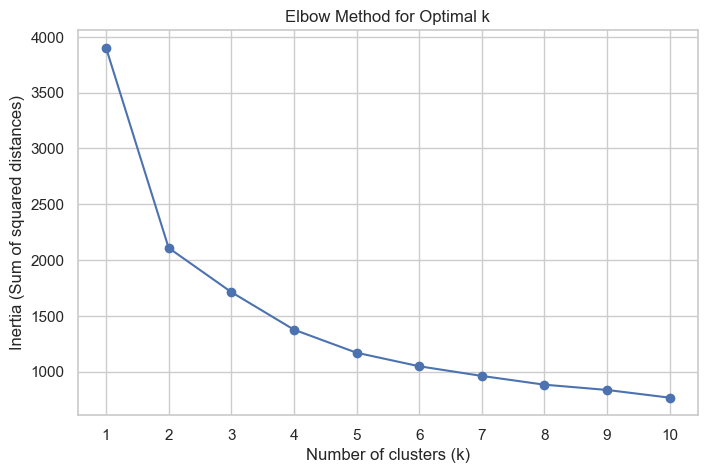

In [47]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# prepared_data is your scaled + encoded DataFrame from before

# Range of clusters to try
k_range = range(1, 11)
inertia = []

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(prepared_data)
    inertia.append(kmeans.inertia_)

# Plot the Elbow curve
plt.figure(figsize=(8, 5))
plt.plot(k_range, inertia, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia (Sum of squared distances)')
plt.xticks(k_range)
plt.grid(True)
plt.show()


In [49]:
from sklearn.cluster import KMeans

# Assume 'prepared_data' is your scaled + encoded DataFrame from previous steps

# Choose number of clusters (replace with your chosen k, e.g., 3)
k = 3

# Initialize and fit KMeans
kmeans = KMeans(n_clusters=k, random_state=42)
clusters = kmeans.fit_predict(prepared_data)

# Add cluster labels to the original data subset (aligned by index)
data_with_clusters = data_subset.copy()
data_with_clusters['Cluster'] = clusters

# View the first few rows with cluster labels
print(data_with_clusters.head())


C:\Users\malyk\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\malyk\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


   Age  Avg_Daily_Usage_Hours  Sleep_Hours_Per_Night  Mental_Health_Score  \
0   19                    5.2                    6.5                    6   
1   22                    2.1                    7.5                    8   
2   20                    6.0                    5.0                    5   
3   18                    3.0                    7.0                    7   
4   21                    4.5                    6.0                    6   

   Addicted_Score  Gender Academic_Level  Cluster  
0               8  Female  Undergraduate        0  
1               3    Male       Graduate        1  
2               9  Female  Undergraduate        0  
3               4    Male    High School        1  
4               7    Male       Graduate        2  


RMSE: 0.226
R^2 Score: 0.980

Feature Importance:
                   Feature  Importance
3      Mental_Health_Score    0.905453
2    Sleep_Hours_Per_Night    0.020869
1    Avg_Daily_Usage_Hours    0.011412
65        Country_Maldives    0.009653
108            Country_USA    0.008562
..                     ...         ...
43         Country_Hungary    0.000000
42       Country_Hong Kong    0.000000
41          Country_Greece    0.000000
40           Country_Ghana    0.000000
115          Country_Yemen    0.000000

[116 rows x 2 columns]


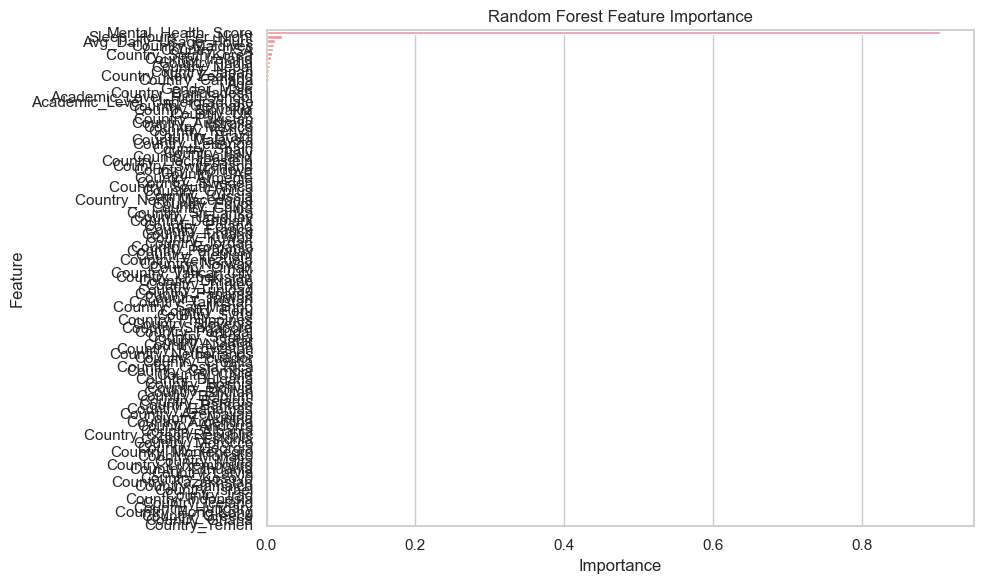

In [57]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# 1. Select features and target
features = ['Age', 'Avg_Daily_Usage_Hours', 'Sleep_Hours_Per_Night', 
            'Mental_Health_Score', 'Gender', 'Academic_Level', 'Country']
target = 'Addicted_Score'

# Filter data and drop missing values
data_model = df[features + [target]].dropna()

# 2. Separate X and y
X = data_model[features]
y = data_model[target]

# 3. One-hot encode categorical variables
X_encoded = pd.get_dummies(X, columns=['Gender', 'Academic_Level', 'Country'], drop_first=True)

# 4. (Optional) Scale numeric features — Random Forest doesn’t require scaling, but you can if you want
# numeric_cols = ['Age', 'Avg_Daily_Usage_Hours', 'Sleep_Hours_Per_Night', 'Mental_Health_Score']
# scaler = StandardScaler()
# X_encoded[numeric_cols] = scaler.fit_transform(X_encoded[numeric_cols])

# 5. Train/test split
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# 6. Train Random Forest Regressor
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# 7. Predict & evaluate
y_pred = rf.predict(X_test)
print(f"RMSE: {mean_squared_error(y_test, y_pred, squared=False):.3f}")
print(f"R^2 Score: {r2_score(y_test, y_pred):.3f}")

# 8. Feature importance
importances = rf.feature_importances_
feature_names = X_encoded.columns

# Create DataFrame of feature importance
feat_imp_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feat_imp_df = feat_imp_df.sort_values(by='Importance', ascending=False)

print("\nFeature Importance:")
print(feat_imp_df)

# Optional: Plot feature importance
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feat_imp_df)
plt.title('Random Forest Feature Importance')
plt.tight_layout()
plt.show()


RMSE: 0.237
R^2 Score: 0.976

Feature Importance:
                         Feature  Importance
3            Mental_Health_Score    0.911010
7                Country_Denmark    0.038353
8                  Country_India    0.019954
1          Avg_Daily_Usage_Hours    0.016835
0                            Age    0.004466
10                   Country_USA    0.003854
2          Sleep_Hours_Per_Night    0.003693
4                    Gender_Male    0.000939
6   Academic_Level_Undergraduate    0.000532
9                Country_Ireland    0.000362
5     Academic_Level_High School    0.000000


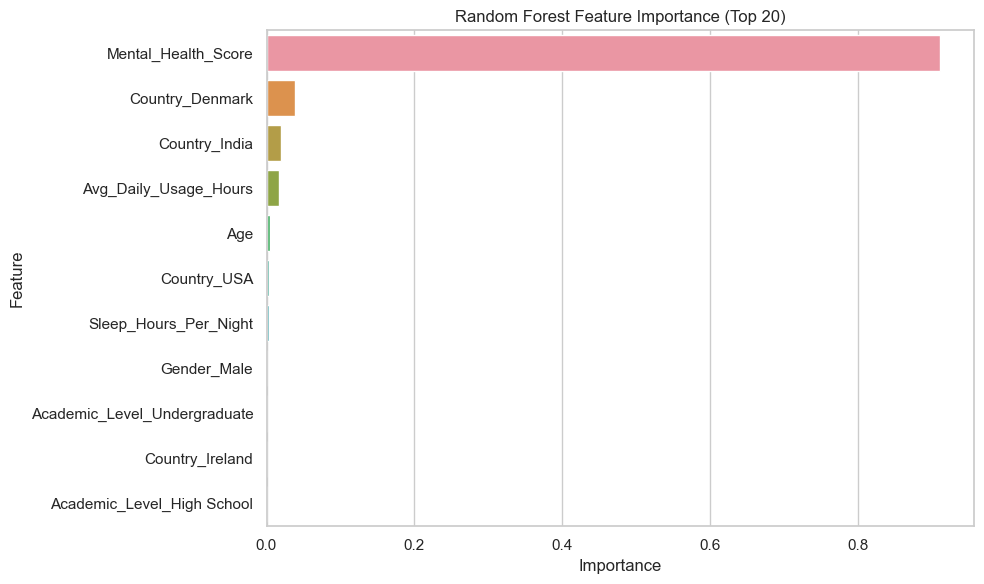

In [67]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

# Assume df is your DataFrame loaded earlier

# Step 1: Identify top 5 countries
top_5_countries = df['Country'].value_counts().nlargest(5).index.tolist()

# Step 2: Filter dataset to only these countries
df_top_countries = df[df['Country'].isin(top_5_countries)].copy()

# Step 3: Select features and target variable
features = ['Age', 'Avg_Daily_Usage_Hours', 'Sleep_Hours_Per_Night', 
            'Mental_Health_Score', 'Gender', 'Academic_Level', 'Country']
target = 'Addicted_Score'

# Step 4: Drop rows with missing data in these columns
data_model = df_top_countries[features + [target]].dropna()

# Step 5: Separate features and target
X = data_model[features]
y = data_model[target]

# Step 6: One-hot encode categorical features (Gender, Academic_Level, Country)
X_encoded = pd.get_dummies(X, columns=['Gender', 'Academic_Level', 'Country'], drop_first=True)

# Step 7: Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X_encoded, y, test_size=0.2, random_state=42
)

# Step 8: Train Random Forest Regressor
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Step 9: Predict on test set and evaluate
y_pred = rf.predict(X_test)
print(f"RMSE: {mean_squared_error(y_test, y_pred, squared=False):.3f}")
print(f"R^2 Score: {r2_score(y_test, y_pred):.3f}")

# Step 10: Extract and display feature importance
importances = rf.feature_importances_
feature_names = X_encoded.columns

feat_imp_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feat_imp_df = feat_imp_df.sort_values(by='Importance', ascending=False)

print("\nFeature Importance:")
print(feat_imp_df.head(20))  # top 20 features for brevity

# Step 11: Plot feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feat_imp_df.head(20))
plt.title('Random Forest Feature Importance (Top 20)')
plt.tight_layout()
plt.show()


In [71]:
!pip install xgboost


   ---------------------------------------- 0.0/150.0 MB ? eta -:--:--
   ---------------------------------------- 0.8/150.0 MB 17.9 MB/s eta 0:00:09
   ---------------------------------------- 1.8/150.0 MB 18.8 MB/s eta 0:00:08
    --------------------------------------- 2.5/150.0 MB 18.0 MB/s eta 0:00:09
    --------------------------------------- 3.4/150.0 MB 18.2 MB/s eta 0:00:09
   - -------------------------------------- 4.3/150.0 MB 18.3 MB/s eta 0:00:08
   - -------------------------------------- 5.2/150.0 MB 19.5 MB/s eta 0:00:08
   - -------------------------------------- 6.2/150.0 MB 18.8 MB/s eta 0:00:08
   - -------------------------------------- 6.9/150.0 MB 18.5 MB/s eta 0:00:08
   -- ------------------------------------- 7.9/150.0 MB 19.4 MB/s eta 0:00:08
   -- ------------------------------------- 8.7/150.0 MB 19.1 MB/s eta 0:00:08
   -- ------------------------------------- 9.6/150.0 MB 19.2 MB/s eta 0:00:08
   -- ------------------------------------- 10.3/150.0 MB 18

In [72]:
from xgboost import XGBRegressor, plot_importance


✅ Gradient Boosting RMSE: 0.233
✅ Gradient Boosting R² Score: 0.977


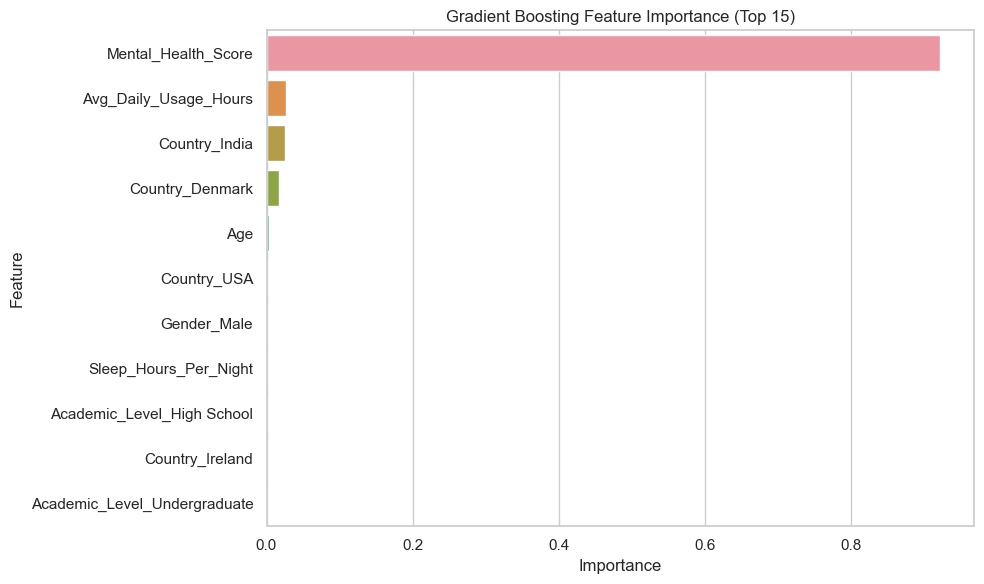

In [75]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Step 1: Get top 5 countries
top_5_countries = df['Country'].value_counts().nlargest(5).index.tolist()

# Step 2: Filter dataset
df_top = df[df['Country'].isin(top_5_countries)].copy()

# Step 3: Select features & target
features = ['Age', 'Avg_Daily_Usage_Hours', 'Sleep_Hours_Per_Night',
            'Mental_Health_Score', 'Gender', 'Academic_Level', 'Country']
target = 'Addicted_Score'

# Step 4: Drop missing values
data_model = df_top[features + [target]].dropna()

# Step 5: Separate features and target
X = data_model[features]
y = data_model[target]

# Step 6: One-hot encode categorical features
X_encoded = pd.get_dummies(X, columns=['Gender', 'Academic_Level', 'Country'], drop_first=True)

# Step 7: Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X_encoded, y, test_size=0.2, random_state=42
)

# Step 8: Train Gradient Boosting Regressor
gbr = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
gbr.fit(X_train, y_train)

# Step 9: Predict and evaluate
y_pred = gbr.predict(X_test)
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

print(f"✅ Gradient Boosting RMSE: {rmse:.3f}")
print(f"✅ Gradient Boosting R² Score: {r2:.3f}")

# Step 10: Feature importance plot
importances = gbr.feature_importances_
feature_names = X_encoded.columns

feat_imp_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feat_imp_df = feat_imp_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feat_imp_df.head(15))
plt.title('Gradient Boosting Feature Importance (Top 15)')
plt.tight_layout()
plt.show()



✅ Gradient Boosting RMSE: 0.408
✅ Gradient Boosting R² Score: 0.933


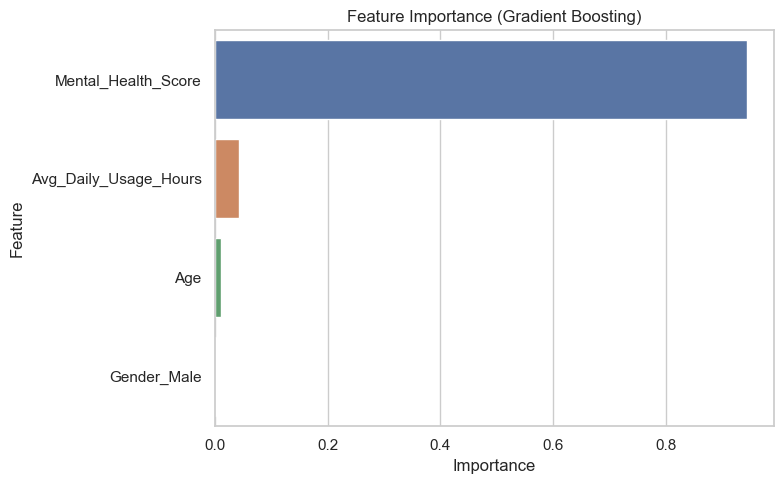

In [77]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Step 1: Select features and target
features = ['Age', 'Avg_Daily_Usage_Hours', 'Mental_Health_Score', 'Gender']
target = 'Addicted_Score'

# Step 2: Drop missing values
data_model = df[features + [target]].dropna()

# Step 3: Split into features and target
X = data_model[features]
y = data_model[target]

# Step 4: One-hot encode Gender
X_encoded = pd.get_dummies(X, columns=['Gender'], drop_first=True)

# Step 5: Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X_encoded, y, test_size=0.2, random_state=42
)

# Step 6: Train Gradient Boosting Regressor
gbr = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
gbr.fit(X_train, y_train)

# Step 7: Predict and evaluate
y_pred = gbr.predict(X_test)
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

print(f"✅ Gradient Boosting RMSE: {rmse:.3f}")
print(f"✅ Gradient Boosting R² Score: {r2:.3f}")

# Step 8: Feature importance plot
importances = gbr.feature_importances_
feature_names = X_encoded.columns

feat_imp_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feat_imp_df = feat_imp_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(8, 5))
sns.barplot(x='Importance', y='Feature', data=feat_imp_df)
plt.title('Feature Importance (Gradient Boosting)')
plt.tight_layout()
plt.show()


✅ Gradient Boosting RMSE: 0.408
✅ Gradient Boosting R² Score: 0.934


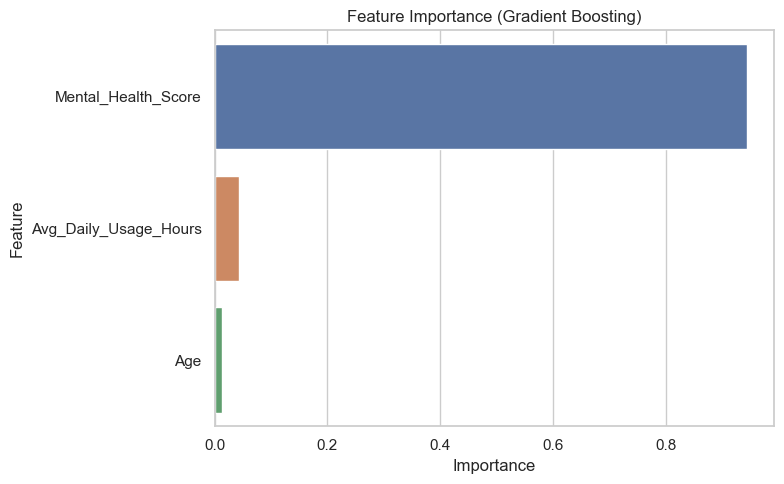

In [79]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Step 1: Select features and target (Gender removed)
features = ['Age', 'Avg_Daily_Usage_Hours', 'Mental_Health_Score']
target = 'Addicted_Score'

# Step 2: Drop missing values
data_model = df[features + [target]].dropna()

# Step 3: Define features and target
X = data_model[features]
y = data_model[target]

# Step 4: Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Step 5: Train Gradient Boosting Regressor
gbr = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
gbr.fit(X_train, y_train)

# Step 6: Predict and evaluate
y_pred = gbr.predict(X_test)
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

print(f"✅ Gradient Boosting RMSE: {rmse:.3f}")
print(f"✅ Gradient Boosting R² Score: {r2:.3f}")

# Step 7: Feature importance plot
importances = gbr.feature_importances_
feature_names = X.columns

feat_imp_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feat_imp_df = feat_imp_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(8, 5))
sns.barplot(x='Importance', y='Feature', data=feat_imp_df)
plt.title('Feature Importance (Gradient Boosting)')
plt.tight_layout()
plt.show()


C:\Users\malyk\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


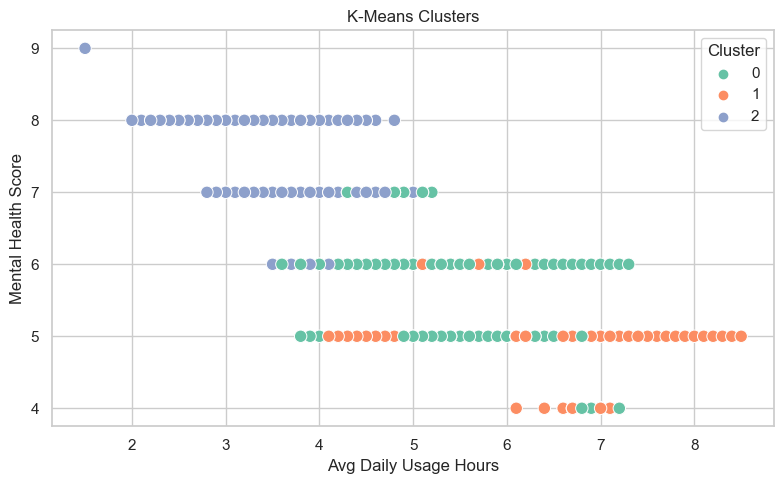

In [83]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Step 1: Select relevant features
features = ['Age', 'Avg_Daily_Usage_Hours', 'Mental_Health_Score']
data_cluster = df[features].dropna()

# Step 2: Standardize the features
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data_cluster)

# Step 3: Apply K-Means
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
clusters = kmeans.fit_predict(scaled_data)

# Step 4: Assign clusters back to the original DataFrame
data_cluster['Cluster'] = clusters

# Step 5: Visualize clusters (2D using first 2 features)
plt.figure(figsize=(8, 5))
sns.scatterplot(
    data=data_cluster,
    x='Avg_Daily_Usage_Hours',
    y='Mental_Health_Score',
    hue='Cluster',
    palette='Set2',
    s=80
)
plt.title('K-Means Clusters')
plt.xlabel('Avg Daily Usage Hours')
plt.ylabel('Mental Health Score')
plt.legend(title='Cluster')
plt.tight_layout()
plt.show()


C:\Users\malyk\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


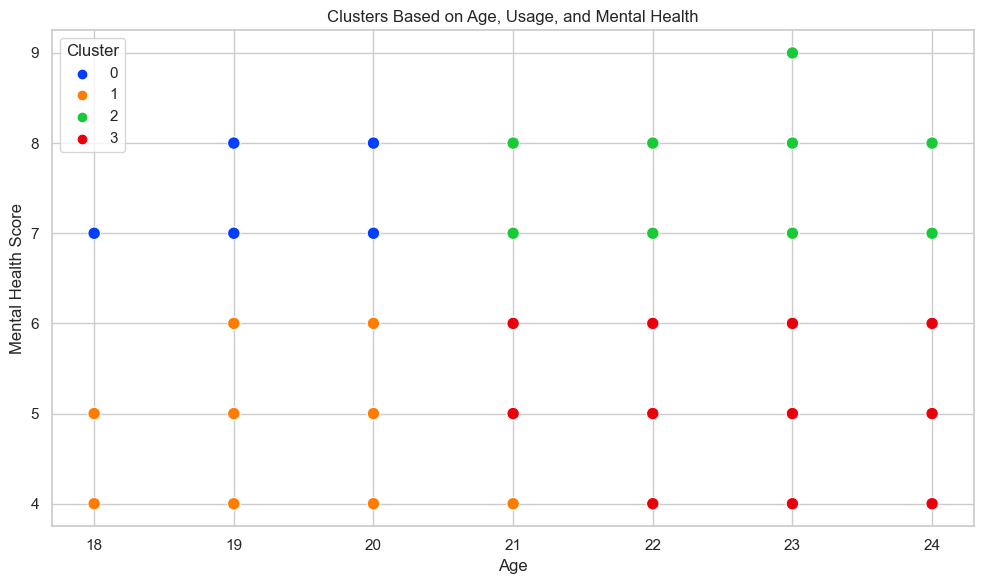

In [87]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Step 1: Select features
features = ['Age', 'Avg_Daily_Usage_Hours', 'Mental_Health_Score']
data_cluster = df[features].dropna()

# Step 2: Standardize the features
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data_cluster)

# Step 3: Apply KMeans with k=4
kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)
data_cluster['Cluster'] = kmeans.fit_predict(scaled_data)

# Step 4: Visualize Clusters using Age vs Mental_Health_Score
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x='Age',
    y='Mental_Health_Score',
    hue='Cluster',
    data=data_cluster,
    palette='bright',
    s=80
)
plt.title('Clusters Based on Age, Usage, and Mental Health')
plt.xlabel('Age')
plt.ylabel('Mental Health Score')
plt.legend(title='Cluster')
plt.tight_layout()
plt.show()



In [3]:
import pandas as pd
import os

folder = "unzipped_archive_3"
filename = "Students Social Media Addiction.csv"
file_path = os.path.join(folder, filename)

if os.path.exists(file_path):
    df = pd.read_csv(file_path)
    print("Data loaded successfully!")
else:
    print(f"File not found: {file_path}")


Data loaded successfully!


In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
import os

# Assume df is loaded (training data)
df.columns = df.columns.str.strip()

# Target and features
target = 'Affects_Academic_Performance'

# Encode target (assuming binary 'Yes'/'No' or similar)
le_target = LabelEncoder()
df[target] = le_target.fit_transform(df[target])

# Prepare features - encode categoricals & select numeric columns
categorical_cols = ['Gender', 'Academic_Level', 'Country', 'Most_Used_Platform',
                    'Relationship_Status', 'Conflicts_Over_Social_Media']
numeric_cols = ['Avg_Daily_Usage_Hours', 'Sleep_Hours_Per_Night', 'Mental_Health_Score']

# Fill missing numeric values with median
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].median())

# Encode categorical features with LabelEncoder for simplicity
for col in categorical_cols:
    df[col] = df[col].fillna('Unknown')  # fill NA in categorical
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])

# Features and target
X = df[categorical_cols + numeric_cols]
y = df[target]

# Train-validation split (80-20)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Random Forest Classifier
rf = RandomForestClassifier(random_state=42, n_estimators=100)
rf.fit(X_train, y_train)

# Predict on validation set
y_pred = rf.predict(X_val)

# Evaluate
print("Accuracy:", accuracy_score(y_val, y_pred))
print(classification_report(y_val, y_pred, target_names=le_target.classes_))

# --- Applying to test data ---

# Load test data file (assuming similar structure but no target column)
test_folder = "unzipped_archive_3"
test_filename = "Students Social Media Addiction Test.csv"  # adjust if needed
test_path = os.path.join(test_folder, test_filename)

if os.path.exists(test_path):
    test_df = pd.read_csv(test_path)
    test_df.columns = test_df.columns.str.strip()

    # Same preprocessing
    test_df[numeric_cols] = test_df[numeric_cols].fillna(df[numeric_cols].median())

    for col in categorical_cols:
        test_df[col] = test_df[col].fillna('Unknown')
        le = LabelEncoder()
        # Fit le on train data categories + transform test (simple approach)
        combined = pd.concat([df[col], test_df[col]], axis=0)
        le.fit(combined)
        test_df[col] = le.transform(test_df[col])

    X_test = test_df[categorical_cols + numeric_cols]

    # Predict on test set
    test_preds = rf.predict(X_test)

    # Inverse transform predictions to original labels
    test_preds_labels = le_target.inverse_transform(test_preds)

    # Create submission DataFrame (assuming test has 'User_ID' column)
    submission = pd.DataFrame({
        'User_ID': test_df['User_ID'],
        target: test_preds_labels
    })

    submission_path = "submission.csv"
    submission.to_csv(submission_path, index=False)
    print(f"Submission saved to {submission_path}")

else:
    print(f"Test file not found: {test_path}")


Accuracy: 1.0
              precision    recall  f1-score   support

          No       1.00      1.00      1.00        54
         Yes       1.00      1.00      1.00        87

    accuracy                           1.00       141
   macro avg       1.00      1.00      1.00       141
weighted avg       1.00      1.00      1.00       141

Test file not found: unzipped_archive_3\Students Social Media Addiction Test.csv
